# Recognising Handwritten Digits on mnist Dataset using KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('seaborn')

In [2]:
df = pd.read_csv('train (1).csv')

In [3]:
print(df.shape)

(42000, 785)


In [4]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = df.values

In [7]:
print(data.shape)

(42000, 785)


In [8]:
print(type(data))

<class 'numpy.ndarray'>


In [9]:
x = data[:,1:]
y = data[:,0]

In [10]:
print(x.shape, y.shape)

(42000, 784) (42000,)


In [11]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
print(y)

[1 0 1 ... 7 6 9]


In [13]:
#Train test split
split = int(0.8 * x.shape[0])

In [14]:
split

33600

In [15]:
x_train = x[:split, :]
y_train = y[:split]

In [16]:
x_test = x[split:, :]
y_test = y[split:]

In [17]:
print(x_train.shape, y_train.shape)

(33600, 784) (33600,)


In [18]:
print(x_test.shape, y_test.shape)

(8400, 784) (8400,)


In [19]:
#Visualise some samples
def drawImage(sample):
    
    #reshape that image
    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()

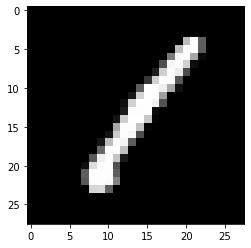

1


In [20]:
drawImage(x_train[0])
print(y_train[0])

In [23]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

#KNN Algo
def knn(x,y,querypoint,k=5):
    
    #Pick k-nearest neighbours
    vals = []
    
    #for every point in the x
    for i in range(x.shape[0]):
        #Compute Distance
        d = distance(querypoint,x[i])
        vals.append((d,y[i]))
        
    #print(vals)
    
    #2. Sort the arrays & give k-nearest points
    vals = sorted(vals)
    
    vals = vals[:k]
    
    #Majority Vote
    vals = np.array(vals)
    new_values = np.unique(vals[:,1], return_counts=True)
    print(new_values)
    
    #Index of MAximum COunt
    index=new_values[1].argmax()
    
    #Map this index with my data
    pred = new_values[0][index]
    
    return pred

In [29]:
#Make predictions over test images
pred = knn(x_train, y_train, x_test[25])

(array([1., 8.]), array([1, 4], dtype=int64))


In [30]:
pred

8.0

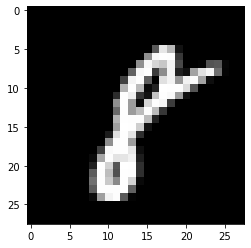

In [31]:
drawImage(x_test[25])

In [32]:
print(y_test[25])

8


In [ ]:
#What is your task?
You have to compute the accuracy of this project

You have xtest values
You have ytest values
You have to make predictions over xtest & then compare